In [1]:
!pip install -Uqq Pillow
!pip install -Uqq fastbook

from fastai.vision.widgets import *
import fastbook
from fastbook import *
import os
from PIL import Image
from IPython.display import display

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#List directory names in the input directory
for dirpath, dirnames, _ in os.walk('/kaggle/input'):
    for dirname in dirnames:
        print(os.path.join(dirpath, dirname))

/kaggle/input/lung-xrays-english-labels
/kaggle/input/lung-xrays-english-labels/archive
/kaggle/input/lung-xrays-english-labels/archive/Lower density (pneumothorax, pneumomediastinum, pneumoperitoneum)
/kaggle/input/lung-xrays-english-labels/archive/Degenerative infectious diseases (tuberculosis , sarcoidosis, proteinosis, fibrosis)
/kaggle/input/lung-xrays-english-labels/archive/Obstructive pulmonary diseases (emphysema, bronchopneumonia, bronchiectasis, embolism)
/kaggle/input/lung-xrays-english-labels/archive/Inflammatory processes (pneumonia)
/kaggle/input/lung-xrays-english-labels/archive/Normal
/kaggle/input/lung-xrays-english-labels/archive/Higher density (pleural effusion, atelectatic consolidation, hydrothorax, empyema)
/kaggle/input/lung-xrays-english-labels/archive/Mediastinal changes (pericarditis, arteriovenous malformations, lymph node enlargement)
/kaggle/input/lung-xrays-english-labels/archive/Chest changes (atelectasis, malformations, agenesis, hypoplasia)
/kaggle/inpu

In [3]:
def is_normal(x): return x[0].isupper()

#Defining a DataBlock for processing the images
xrays = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

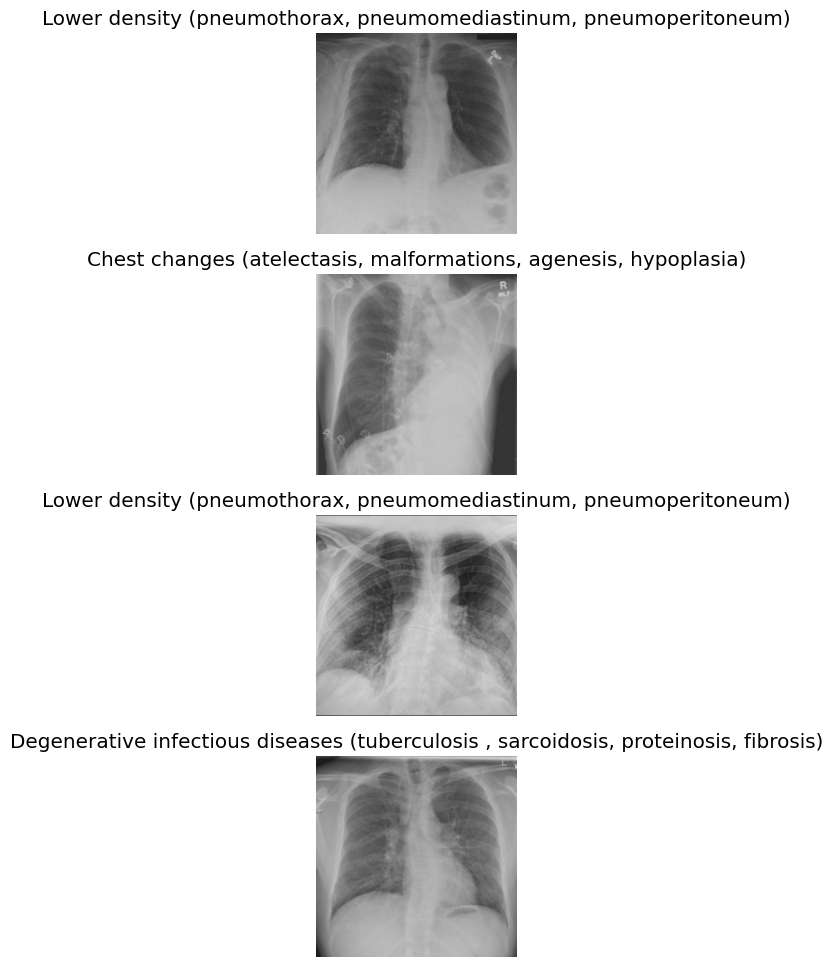

In [4]:
#Creating DataLoaders and displaying a batch of validation set images
path = '/kaggle/input/lung-xrays-english-labels/archive'
dls = xrays.dataloaders(path, label_func=is_normal)
dls.valid.show_batch(max_n=4, nrows=4)

In [5]:
#First try at fine-tuning resnet50,resulted in an error rate of >0.02

#learn = vision_learner(dls, resnet50, metrics=error_rate)
#learn.fine_tune(epochs=5)
#learn.recorder.plot_loss()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 247MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.230567,0.650510,0.192136,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.365919,0.276511,0.080861,01:00
1,0.208680,0.214312,0.068991,01:01
2,0.101738,0.166624,0.048961,01:00
3,0.069786,0.183940,0.054154,01:00
4,0.060251,0.115830,0.037092,01:00
5,0.042498,0.100942,0.024481,01:00
6,0.035062,0.098914,0.031157,01:00
7,0.026407,0.090364,0.025223,01:00
8,0.019591,0.106212,0.027448,01:00
9,0.014968,0.092550,0.028932,01:00


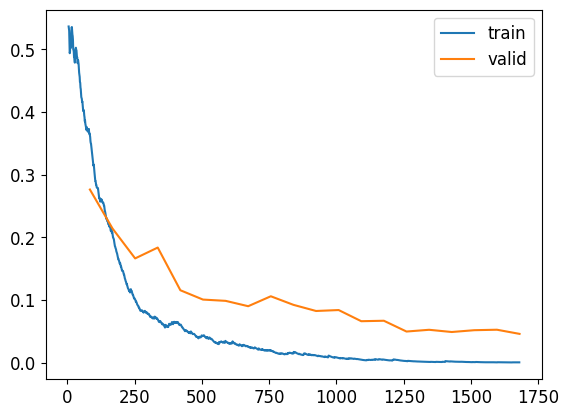

In [6]:
#Using the same architecture, but trying to decrease error rate and speed up computation

learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(epochs=20)
learn.recorder.plot_loss()

In [7]:
# Export model
learn.export('model.pkl')